In [1]:
import torch
from torch import nn

In [2]:
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [38]:
from torch import nn, optim
from sklearn.datasets import load_digits

In [4]:
df = load_digits()

In [20]:
X = df.data
y = df.target

In [21]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

In [7]:
ce_loss = nn.CrossEntropyLoss()

In [8]:
opt = optim.Adam(net.parameters())

In [9]:
losses = []

In [10]:
for e in range(100) :
  opt.zero_grad()

  pred = net(X)

  loss = ce_loss(pred, y)
  loss.backward()

  opt.step()

  losses.append(loss.item())

In [11]:
X = X.to('cuda:0')
y = y.to('cuda:0')
net.to('cuda:0')

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)

In [12]:
from torch.utils.data import TensorDataset, DataLoader

In [22]:
ds = TensorDataset(X, y)

In [23]:
loader = DataLoader(ds, batch_size = 64, shuffle = True)

In [24]:
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [25]:
ce_loss = nn.CrossEntropyLoss()

In [26]:
opt = optim.Adam(net.parameters())

In [27]:
losses = []

In [28]:
for e in range(100):
  loss = .0
  for x, y in loader :
    pred = net(x)
    tr_loss = ce_loss(pred, y)

    opt.zero_grad()
    tr_loss.backward()
    opt.step()
    loss +=  tr_loss.item()
  losses.append(tr_loss)

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.data
y = df.target

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 403)

In [34]:
X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)

y_train = torch.tensor(y_train, dtype = torch.int64)
y_test = torch.tensor(y_test, dtype = torch.int64)

In [39]:
net = nn.Sequential(
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [40]:
loss_fn = nn.CrossEntropyLoss()

In [41]:
optimizer = optim.Adam(net.parameters())

In [42]:
ds = TensorDataset(X_train, y_train)

In [43]:
loader = DataLoader(ds, batch_size = 32, shuffle = True)

In [44]:
tr_losses = []
te_losses = []

In [45]:
for e in range(100) :
  running_loss = 0
  for i, (xx, yy) in enumerate(loader) :
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  tr_losses.append(running_loss / i)
  y_pred = net(X_test)
  te_loss = loss_fn(y_pred, y_test)
  te_losses.append(te_loss.item())

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

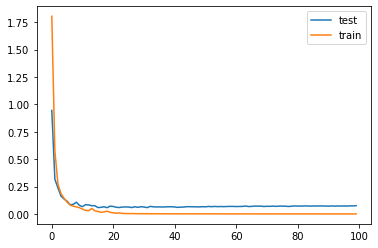

In [52]:
plt.plot(te_losses, label = 'test')
plt.plot(tr_losses, label = 'train')
plt.legend()
plt.show()

In [74]:
net = nn.Sequential(
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(.4),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(.4),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [75]:
tr_losses = []
te_losses = []

In [76]:
for e in range(100) :
  running_loss = 0
  for i, (xx, yy) in enumerate(loader) :
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  tr_losses.append(running_loss / i)
  y_pred = net(X_test)
  te_loss = loss_fn(y_pred, y_test)
  te_losses.append(te_loss.item())

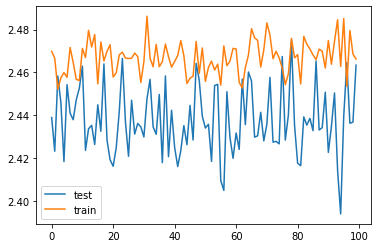

In [77]:
plt.plot(te_losses, label = 'test')
plt.plot(tr_losses, label = 'train')
plt.legend()
plt.show()

In [79]:
net = nn.Sequential(
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Dropout(.4),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [80]:
tr_losses = []
te_losses = []

In [81]:
for e in range(100) :
  running_loss = 0
  for i, (xx, yy) in enumerate(loader) :
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  tr_losses.append(running_loss / i)
  y_pred = net(X_test)
  te_loss = loss_fn(y_pred, y_test)
  te_losses.append(te_loss.item())

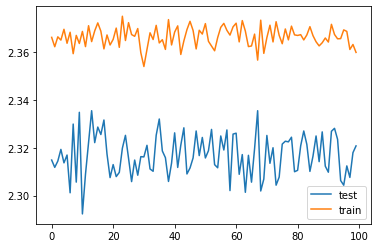

In [82]:
plt.plot(te_losses, label = 'test')
plt.plot(tr_losses, label = 'train')
plt.legend()
plt.show()

In [86]:
class custom_nn(nn.Module) :
  def __init__(self, in_features, out_features, bias = True, p = .5) :
    super().__init__()
    self.linear = nn.Linear(in_features, out_features, bias)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(p)

  def forward(self, x) :
    x = self.Linear(x)
    x = self.relu(x)
    x = self.drop(x)

    return x

In [87]:
mlp = nn.Sequential(
    custom_nn(64, 100),
    custom_nn(100, 100),
    custom_nn(100, 64),
    nn.Linear(64, 10)
)

In [89]:
class custom_nn2(nn.Module) :
  def __init__(self, in_features, out_features) :
    super().__init__()
    self.ln1 = custom_nn(in_features, 100)
    self.ln2 = custom_nn(100, 64)
    self.ln3 = custom_nn(64, out_features)

  def forward(self, x) :
    x = self.ln1(x)
    x = self.ln2(x)
    x = self.ln3(x)

    return x

In [90]:
mlp = custom_nn2(64, 10)